In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from pylab import rcParams
rcParams['figure.figsize']= 20, 5

In [2]:
train = pd.read_csv("D:\\Data_sets\\house-prices-advanced-regression-techniques\\train.csv")

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
train.shape

(1460, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,'percent_missing': percent_missing})

In [8]:
missing_value_df[missing_value_df.percent_missing > 50]

,column_name,percent_missing
Alley,Alley,93.767123
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


<AxesSubplot:>

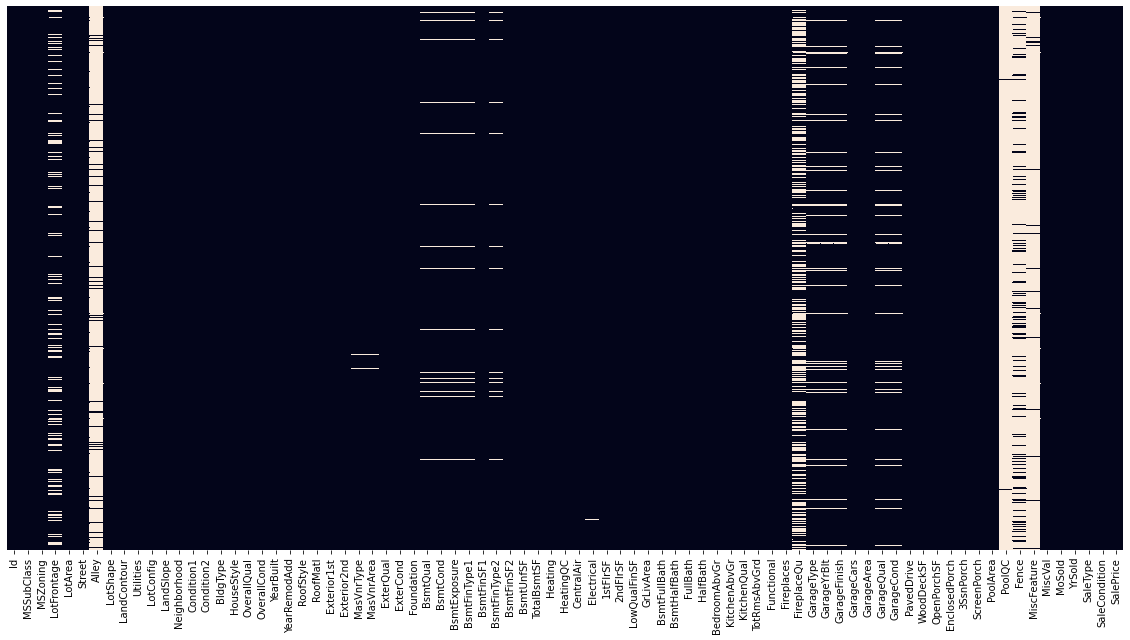

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)


### Id

In [10]:
train.drop('Id', axis=1, inplace=True)

### MSSubClass: Identifies the type of dwelling involved in the sale

In [11]:
train.MSSubClass.isnull().sum() * 100 / len(train)

0.0

### MSZoning: Identifies the general zoning classification of the sale

In [12]:
train.MSZoning.isnull().sum() * 100 / len(train)

0.0

### LotFrontage: Linear feet of street connected to property

In [13]:
train.LotFrontage.isnull().sum() * 100 / len(train)

17.73972602739726

In [14]:
train.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [15]:
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.mean())

In [16]:
train.LotFrontage.isnull().sum() 

0

### LotArea: Lot size in square feet

In [17]:
train.LotArea.isnull().sum() * 100 / len(train)

0.0

### Street: Type of road access to property

In [18]:
train.Street.isnull().sum() * 100 / len(train)

0.0

### Alley: Type of alley access to property

In [19]:
train.Alley.isnull().sum() * 100 / len(train)

93.76712328767124

In [20]:
train.drop('Alley', axis=1, inplace=True)

### LotShape: General shape of property

In [21]:
train.BedroomAbvGr.isnull().sum() * 100 / len(train)

0.0

### LandContour: Flatness of the property

In [22]:
train.LandContour.isnull().sum() * 100 / len(train)

0.0

### Utilities: Type of utilities available

In [23]:
train.Utilities.isnull().sum() * 100 / len(train)

0.0

### LotConfig: Lot configuration

In [24]:
train.LotConfig.isnull().sum() * 100 / len(train)

0.0

### LandSlope: Slope of property

In [25]:
train.LandSlope.isnull().sum() * 100 / len(train)

0.0

### Neighborhood: Physical locations within Ames city limits

In [26]:
train.Neighborhood.isnull().sum() * 100 / len(train)

0.0

### Condition1: Proximity to various conditions

In [27]:
train.Condition1.isnull().sum() * 100 / len(train)

0.0

### Condition2: Proximity to various conditions (if more than one is present)

In [28]:
train.Condition1.isnull().sum() * 100 / len(train)

0.0

### BldgType: Type of dwelling

In [29]:
train.BldgType.isnull().sum() * 100 / len(train)

0.0

### HouseStyle: Style of dwelling

In [30]:
train.HouseStyle.isnull().sum() * 100 / len(train)

0.0

### OverallQual: Rates the overall material and finish of the house

In [31]:
train.HouseStyle.isnull().sum() * 100 / len(train)

0.0

### OverallCond: Rates the overall condition of the house

In [32]:
train.OverallCond.isnull().sum() * 100 / len(train)

0.0

### YearBuilt: Original construction date

In [33]:
train.YearBuilt.isnull().sum() * 100 / len(train)

0.0

### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [34]:
train.YearRemodAdd.isnull().sum() * 100 / len(train)

0.0

### RoofStyle: Type of roof

In [35]:
train.RoofStyle.isnull().sum() * 100 / len(train)

0.0

### RoofMatl: Roof material

In [36]:
train.RoofMatl.isnull().sum() * 100 / len(train)

0.0

### Exterior1st: Exterior covering on house

In [37]:
train.RoofMatl.isnull().sum() * 100 / len(train)

0.0

### Exterior2nd: Exterior covering on house (if more than one material)

In [38]:
train.RoofMatl.isnull().sum() * 100 / len(train)

0.0

### MasVnrType: Masonry veneer type

In [39]:
train.MasVnrType.isnull().sum() * 100 / len(train)

0.547945205479452

In [40]:
train.MasVnrType

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [41]:
train.MasVnrType = train.MasVnrType.fillna(train.MasVnrType.mode()[0])

### MasVnrArea: Masonry veneer area in square feet

In [42]:
train.MasVnrArea.isnull().sum() * 100 / len(train)

0.547945205479452

In [43]:
train.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [44]:
train.MasVnrArea = train.MasVnrArea.fillna(train.MasVnrArea.mean())

### ExterQual: Evaluates the quality of the material on the exterior

In [45]:
train.ExterQual.isnull().sum() * 100 / len(train)

0.0

### ExterCond: Evaluates the present condition of the material on the exterior

In [46]:
train.ExterCond.isnull().sum() * 100 / len(train)

0.0

### Foundation: Type of foundation

In [47]:
train.Foundation.isnull().sum() * 100 / len(train)

0.0

### BsmtQual: Evaluates the height of the basement

In [48]:
train.BsmtQual.isnull().sum() * 100 / len(train)

2.5342465753424657

In [49]:
train.BsmtQual

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [50]:
train.BsmtQual = train.BsmtQual.fillna(train.BsmtQual.mode()[0])

### BsmtCond: Evaluates the general condition of the basement

In [51]:
train.BsmtCond.isnull().sum() * 100 / len(train)

2.5342465753424657

In [52]:
train.BsmtCond

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

In [53]:
train.BsmtCond = train.BsmtCond.fillna(train.BsmtCond.mode()[0])

### BsmtExposure: Refers to walkout or garden level walls

In [54]:
train.BsmtExposure.isnull().sum() * 100 / len(train)

2.6027397260273974

In [55]:
train.BsmtExposure

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

In [56]:
train.BsmtExposure = train.BsmtExposure.fillna(train.BsmtExposure.mode()[0])

### BsmtFinType1: Rating of basement finished area

In [57]:
train.BsmtFinType1.isnull().sum() * 100 / len(train)

2.5342465753424657

In [58]:
train.BsmtFinType1

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

In [59]:
train.BsmtFinType1 = train.BsmtFinType1.fillna(train.BsmtFinType1.mode()[0])

### BsmtFinSF1: Type 1 finished square feet

In [60]:
train.BsmtFinSF1.isnull().sum() * 100 / len(train)

0.0

### BsmtFinType2: Rating of basement finished area (if multiple types)

In [61]:
train.BsmtFinType2.isnull().sum() * 100 / len(train)

2.6027397260273974

In [62]:
train.BsmtFinType2

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

In [63]:
train.BsmtFinType2 = train.BsmtFinType2.fillna(train.BsmtFinType2.mode()[0])

### BsmtFinSF2: Type 2 finished square feet

In [64]:
train.BsmtFinSF2.isnull().sum() * 100 / len(train)

0.0

### BsmtUnfSF: Unfinished square feet of basement area

In [65]:
train.BsmtUnfSF.isnull().sum() * 100 / len(train)

0.0

### TotalBsmtSF: Total square feet of basement area

In [66]:
train.BsmtUnfSF.isnull().sum() * 100 / len(train)

0.0

### Heating: Type of heating

In [67]:
train.Heating.isnull().sum() * 100 / len(train)

0.0

### HeatingQC: Heating quality and condition

In [68]:
train.HeatingQC.isnull().sum() * 100 / len(train)

0.0

### CentralAir: Central air conditioning

In [69]:
train.CentralAir.isnull().sum() * 100 / len(train)

0.0

### Electrical: Electrical system

In [70]:
train.Electrical.isnull().sum() * 100 / len(train)

0.0684931506849315

In [71]:
train.Electrical

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [72]:
train.Electrical = train.Electrical.fillna(train.Electrical.mode()[0])

### 1stFlrSF: First Floor square feet

In [73]:
train['CentralAir'].isnull().sum() * 100 / len(train)

0.0

### 2ndFlrSF: Second floor square feet

In [74]:
train['CentralAir'].isnull().sum() * 100 / len(train)

0.0

### LowQualFinSF: Low quality finished square feet (all floors)

In [75]:
train.LowQualFinSF.isnull().sum() * 100 / len(train)

0.0

### GrLivArea: Above grade (ground) living area square feet

In [76]:
train.GrLivArea.isnull().sum() * 100 / len(train)

0.0

### BsmtFullBath: Basement full bathrooms

In [77]:
train.GrLivArea.isnull().sum() * 100 / len(train)

0.0

### BsmtHalfBath: Basement half bathrooms

In [78]:
train.BsmtHalfBath.isnull().sum() * 100 / len(train)

0.0

### FullBath: Full bathrooms above grade

In [79]:
train.FullBath.isnull().sum() * 100 / len(train)

0.0

### HalfBath: Half baths above grade

In [80]:
train.FullBath.isnull().sum() * 100 / len(train)

0.0

### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

In [81]:
train.BedroomAbvGr.isnull().sum() * 100 / len(train)

0.0

### KitchenAbvGr: Kitchens above grade

In [82]:
train.KitchenAbvGr.isnull().sum() * 100 / len(train)

0.0

### KitchenQual: Kitchen quality

In [83]:
train.KitchenQual.isnull().sum() * 100 / len(train)

0.0

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [84]:
train.TotRmsAbvGrd.isnull().sum() * 100 / len(train)

0.0

### Functional: Home functionality (Assume typical unless deductions are warranted)

In [85]:
train.Functional.isnull().sum() * 100 / len(train)

0.0

### Fireplaces: Number of fireplaces

In [86]:
train.Fireplaces.isnull().sum() * 100 / len(train)

0.0

### FireplaceQu: Fireplace quality

In [87]:
train.FireplaceQu.isnull().sum() * 100 / len(train)

47.26027397260274

In [88]:
train.FireplaceQu

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [89]:
train.FireplaceQu = train.FireplaceQu.fillna(train.FireplaceQu.mode()[0])

### GarageType: Garage location

In [90]:
train.GarageType.isnull().sum() * 100 / len(train)

5.5479452054794525

In [91]:
train.GarageType

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [92]:
train.GarageType = train.GarageType.fillna(train.GarageType.mode()[0])

### GarageYrBlt: Year garage was built

In [93]:
train.GarageYrBlt.isnull().sum() * 100 / len(train)

5.5479452054794525

In [94]:
train.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [95]:
train.GarageYrBlt = train.GarageYrBlt.fillna(train.GarageYrBlt.mean())

### GarageFinish: Interior finish of the garage

In [96]:
train.GarageFinish.isnull().sum() * 100 / len(train)

5.5479452054794525

In [97]:
train.GarageFinish

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [98]:
train.GarageFinish = train.GarageFinish.fillna(train.GarageFinish.mode()[0])

### GarageCars: Size of garage in car capacity

In [99]:
train.GarageCars.isnull().sum() * 100 / len(train)

0.0

### GarageArea: Size of garage in square feet

In [100]:
train.GarageArea.isnull().sum() * 100 / len(train)

0.0

### GarageQual: Garage quality

In [101]:
train.GarageQual.isnull().sum() * 100 / len(train)

5.5479452054794525

In [102]:
train.GarageQual

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object

In [103]:
train.GarageQual = train.GarageQual.fillna(train.GarageQual.mode()[0])

### GarageCond: Garage condition

In [104]:
train.GarageCond.isnull().sum() * 100 / len(train)

5.5479452054794525

In [105]:
train.GarageCond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

In [106]:
train.GarageCond = train.GarageCond.fillna(train.GarageCond.mode()[0])

### PavedDrive: Paved driveway

In [107]:
train.PavedDrive.isnull().sum() * 100 / len(train)

0.0

### WoodDeckSF: Wood deck area in square feet

In [108]:
train.WoodDeckSF.isnull().sum() * 100 / len(train)

0.0

### OpenPorchSF: Open porch area in square feet

In [109]:
train.OpenPorchSF.isnull().sum() * 100 / len(train)

0.0

### EnclosedPorch: Enclosed porch area in square feet

In [110]:
train.EnclosedPorch.isnull().sum() * 100 / len(train)

0.0

### 3SsnPorch: Three season porch area in square feet

In [111]:
train['3SsnPorch'].isnull().sum() * 100 / len(train)

0.0

### ScreenPorch: Screen porch area in square feet

In [112]:
train.ScreenPorch.isnull().sum() * 100 / len(train)

0.0

### PoolArea: Pool area in square feet

In [113]:
train.PoolArea.isnull().sum() * 100 / len(train)

0.0

### PoolQC: Pool quality

In [114]:
train.PoolQC.isnull().sum() * 100 / len(train)

99.52054794520548

In [115]:
train.drop('PoolQC', axis=1, inplace=True)

### Fence: Fence quality

In [116]:
train.Fence.isnull().sum() * 100 / len(train)

80.75342465753425

In [117]:
train.drop('Fence', axis=1, inplace=True)

### MiscFeature: Miscellaneous feature not covered in other categories

In [118]:
train.MiscFeature.isnull().sum() * 100 / len(train)

96.3013698630137

In [119]:
train.drop('MiscFeature', axis=1, inplace=True)

### MiscVal: $Value of miscellaneous feature

In [120]:
train.MiscVal.isnull().sum() * 100 / len(train)

0.0

### MoSold: Month Sold (MM)

In [121]:
train.MiscVal.isnull().sum() * 100 / len(train)

0.0

### YrSold: Year Sold (YYYY)

In [122]:
train.YrSold.isnull().sum() * 100 / len(train)

0.0

### SaleType: Type of sale

In [123]:
train.SaleType.isnull().sum() * 100 / len(train)

0.0

### SaleCondition: Condition of sale

In [124]:
train.SaleCondition.isnull().sum() * 100 / len(train)

0.0

In [125]:
train.isnull().sum().sum()

0

In [126]:
train.shape

(1460, 76)

In [127]:
test = pd.read_csv("test.csv")

In [128]:
test.shape

(1459, 75)

In [129]:
test.isnull().sum().sum()

0

In [130]:
categorical_col= train.select_dtypes(include=['object']).columns.tolist()

In [131]:
train.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [132]:
train.select_dtypes(include=np.number).columns.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [134]:
## handle categorial features (one_hot encoding)

In [135]:
def category_onehot_multcols(multcolumns, final_df):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [136]:
main_df=train.copy()

In [137]:
# comcat train with train  row-wise

In [138]:
final_df=pd.concat([train,test],axis=0)

In [139]:
final_df.shape

(2919, 76)

In [141]:
final_df=category_onehot_multcols(categorical_col, final_df)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [142]:
final_df.shape

(2919, 237)

In [143]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Gd,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [144]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [148]:
final_df.shape

(2919, 177)

In [149]:
train=final_df.iloc[:1460,:]
test=final_df.iloc[1460:,:]

In [150]:
train.shape

(1460, 177)

In [151]:
test.shape

(1459, 177)

In [152]:
test.drop(['SalePrice'],axis=1,inplace=True)

In [153]:
X_train=train.drop(['SalePrice'],axis=1)
y_train=train['SalePrice']

In [154]:
## modeltraining

In [156]:
import xgboost
regressor=xgboost.XGBRegressor()

In [157]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
y_pred=regressor.predict(test)

In [161]:
pred=pd.DataFrame(y_pred)

In [162]:
##Create Sample Submission file and Submit using ANN

sub_df=train = pd.read_csv("D:\\Data_sets\\house-prices-advanced-regression-techniques\\sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)